##### import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [1]:
import numpy as np
my_seed =5 ##5可以
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf

tf.random.set_seed(my_seed)

In [2]:
zhou = 4
dian = 10

In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from numpy import concatenate
from matplotlib import pyplot
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from keras.layers import *
from keras.models import *
#导入时间库计时
import time
import warnings
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
#设置字体为SimHei显示中文  #设置正常显示字符
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")


In [4]:
plt.rc('font', family='Times New Roman')
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=17, color='grey')
plt.rc('ytick', labelsize=17, color='grey')
plt.rc('legend', fontsize=15, loc='lower left')
plt.rc('figure', titlesize=12)
plt.rc('savefig', dpi=500, bbox='tight')
%matplotlib inline

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
df = pd.read_csv(r"E:\桌面\活\活2（python）\特征选择-csv文件\筛选后的负荷与其它特征.csv")

In [6]:
df = df.set_index("datetime")

In [7]:
df  =df['2015-01-04':'2020-03-09']

In [8]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,T2M_dav,Holiday_ID,holiday,hour_of_day,month_of_year,day_of_week,working_day
datetime,,,,,,,,,,,,,
2015-01-04 00:00:00,968.0526,25.769189,0.018555,0.003251,19.700352,23.823877,22.730127,0,0,0,1,7,0
2015-01-04 01:00:00,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,22.533380,0,0,1,1,7,0
2015-01-04 02:00:00,928.7193,25.602319,0.018486,0.004625,19.863871,23.477319,22.360132,0,0,2,1,7,0
2015-01-04 03:00:00,909.5566,25.572656,0.018448,0.008533,20.362023,23.369531,22.244531,0,0,3,1,7,0
2015-01-04 04:00:00,894.6543,25.547144,0.018409,0.008694,20.651574,23.281519,22.148706,0,0,4,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 19:00:00,1280.9166,26.195520,0.015070,0.013897,26.664170,26.258020,24.133020,0,0,19,3,7,0
2020-03-08 20:00:00,1283.4224,26.030908,0.015139,0.014648,26.250229,25.640283,23.609033,0,0,20,3,7,0
2020-03-08 21:00:00,1277.9559,25.977258,0.015112,0.013309,26.495268,25.289758,23.352258,0,0,21,3,7,0


In [9]:
true_Y = df.iloc[-24*7:,0].values.copy()

In [10]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,T2M_dav,Holiday_ID,holiday,hour_of_day,month_of_year,day_of_week,working_day
datetime,,,,,,,,,,,,,
2015-01-04 00:00:00,968.0526,25.769189,0.018555,0.003251,19.700352,23.823877,22.730127,0,0,0,1,7,0
2015-01-04 01:00:00,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,22.533380,0,0,1,1,7,0
2015-01-04 02:00:00,928.7193,25.602319,0.018486,0.004625,19.863871,23.477319,22.360132,0,0,2,1,7,0
2015-01-04 03:00:00,909.5566,25.572656,0.018448,0.008533,20.362023,23.369531,22.244531,0,0,3,1,7,0
2015-01-04 04:00:00,894.6543,25.547144,0.018409,0.008694,20.651574,23.281519,22.148706,0,0,4,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 19:00:00,1280.9166,26.195520,0.015070,0.013897,26.664170,26.258020,24.133020,0,0,19,3,7,0
2020-03-08 20:00:00,1283.4224,26.030908,0.015139,0.014648,26.250229,25.640283,23.609033,0,0,20,3,7,0
2020-03-08 21:00:00,1277.9559,25.977258,0.015112,0.013309,26.495268,25.289758,23.352258,0,0,21,3,7,0


In [11]:
true = df.iloc[-24*7:,:]
df_1 = df.iloc[:-24*7,:]

In [12]:
df_load = df_1.values
scaler_load = MinMaxScaler(feature_range=(0,1))
df_load = scaler_load.fit_transform(df_load)

In [13]:
scaler_load.transform(true)

array([[0.63728609, 0.17532409, 0.34626958, ..., 0.18181818, 0.        ,
        1.        ],
       [0.5920826 , 0.16213596, 0.36713473, ..., 0.18181818, 0.        ,
        1.        ],
       [0.56624905, 0.15119256, 0.3851685 , ..., 0.18181818, 0.        ,
        1.        ],
       ...,
       [0.7143624 , 0.25018811, 0.28751121, ..., 0.18181818, 1.        ,
        0.        ],
       [0.68662892, 0.24297163, 0.29324644, ..., 0.18181818, 1.        ,
        0.        ],
       [0.66496226, 0.23077078, 0.30472319, ..., 0.18181818, 1.        ,
        0.        ]])

In [14]:
df_1.iloc[:,:]  = df_load

In [15]:
#周期点LSTM输入# time_steps 为取time_steps-1个周 当时间步数，week_steps为一周期多少数据
def train_week(data,time_steps,week_steps ,n_in, n_out, dropnan=True):  
    data =data.reshape(-1,1)
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    #数据序列(也将就是input) input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        #预测数据（input对应的输出值） forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #拼接 put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
   # 删除值为NAN的行 drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    agg = agg.iloc[:, [week_steps*(time_steps-1), week_steps*(time_steps-2),week_steps*(time_steps-3), week_steps*(time_steps-4),week_steps*(time_steps-5)]] #取出每周的相同时刻
    train_x = agg.iloc[:,1:].values
    train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
    train_y = agg.iloc[:,0].values
    return train_x,train_y,agg

In [16]:
#邻近点LSTM输入
def train_split(timestep, nextstep,train,all_nextstep):   #timestep时间步长, nextstep一次预测多长时间,,all_nextstep总计需要预测时间
    # load dataset
#     scaled=scaled.values
    train =train.reshape(-1,1)
#     train = scaled[:, :]

    train_X = []
    train_y = []


    # 训练集：
    # 利用for循环，遍历整个测试集，提取测试集中连续360min的特征量作为输入特征test_X，第361-370min的发电量作为标签
    for i in range(len(train)-timestep-nextstep+1):
        train_X.append(train[i:(i+timestep), :])
        btemp = train[i+timestep:i+timestep+nextstep, 0]
        b = []
        for j in range(len(btemp)):
            b.append(btemp[j])
        train_y.append(b)

    # 将训练集由list格式变为array格式
    train_X = np.array(train_X)
    train_y = np.array(train_y)

    # 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
    train_X = np.reshape(train_X, (train_X.shape[0],timestep, train_X.shape[2]))


    return train_X, train_y

In [17]:
#转成有监督数据
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    #数据序列(也将就是input) input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        #预测数据（input对应的输出值） forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #拼接 put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
# 用前8个预测1个
df_point = series_to_supervised(df_1,dian,1)

In [19]:
df_point = df_point.reset_index(drop=True)

In [20]:
#取出8 负荷时间天气
df_point_input = pd.DataFrame()
for i in range (dian+1):
    if i < dian:
        df_point_input= pd.concat([df_point_input,df_point.iloc[:,df.shape[1]*i]],axis = 1)
        df_point_input = pd.concat([df_point_input,df_point.iloc[:,-df.shape[1]+1:]],axis = 1)
    else:
        df_point_input= pd.concat([df_point_input,df_point.iloc[:,df.shape[1]*i:]],axis =1)

In [21]:
#先往前挪四周的点
df_week = series_to_supervised(df_1,zhou*7*24,1)

In [22]:
df_week = df_week.reset_index(drop=True)

In [23]:
#取出前4周相同时刻的 负荷时间天气
df_week_input = pd.DataFrame()
for i in range (zhou+1):
    if i < zhou:
        df_week_input = pd.concat([df_week_input,df_week.iloc[:,df.shape[1]*24*7*i]],axis = 1)
        df_week_input = pd.concat([df_week_input,df_week.iloc[:,-df.shape[1]+1:]],axis = 1)
    else:
        df_week_input = pd.concat([df_week_input,df_week.iloc[:,df.shape[1]*24*7*i:]],axis =1)

In [24]:
# 将两个lstm输入变为一至，往前挪的长度不一致，导致被消除的行数有所区别，这里统一长度
df_point_input = df_point_input[(df_point_input.shape[0] - df_week_input.shape[0]):]

In [25]:
# 构建前四周 相同点输入
df_week_input_1 = df_week_input.iloc[:,:-df.shape[1]]
df_week_input_1 = df_week_input_1.values.reshape(df_week_input_1.shape[0],zhou,df.shape[1])

In [26]:
#构建邻近八点 输入
df_point_input_1 = df_point_input.iloc[:,:-df.shape[1]]
df_point_input_1 = df_point_input_1.values.reshape(df_point_input_1.shape[0],dian,df.shape[1])

In [27]:
# 输出
df_week_output_1 = df_week_input.iloc[:,-df.shape[1]:]
df_point_output_1 = df_point_input.iloc[:,-df.shape[1]:]

In [28]:
#预测总条数 
pre_number = 7*24

In [29]:
# 定义自注意力机制
def attention_3d_block(inputs):
    input_dim = int(inputs.shape[1])
    x = Permute((2,1))(inputs)
    x = Dense(input_dim,activation="softmax",name='attention_1')(x)
    attention_probs = Permute((2,1))(x)
    multipy_layer = Multiply()([inputs,attention_probs])
    return multipy_layer

In [30]:
# input1 为临近点输入 临近点取的是步
input1 = Input(shape=(df_point_input_1.shape[1], df_point_input_1.shape[2]))
conv_out1_1 = Conv1D(filters=32, kernel_size=round(dian/2), activation='sigmoid')(input1) #24

lstm_1_1 = GRU(32,activation='sigmoid',return_sequences=True,stateful=False)(conv_out1_1)
lstm_1_1 = Dropout(0.1)(lstm_1_1)#0.1
# z1 = Lambda(lambda k: K.permute_dimensions(k, (0, 2, 1)))(lstm1out_1)
# conv_out1_1 = Conv1D(filters=24, kernel_size=dian, activation='relu')(lstm_1_1) #24
lstm_1_2 = GRU(24,activation='sigmoid',return_sequences=False,stateful=False)(lstm_1_1)

In [31]:
# input2 为临近周同时刻输入 取的是步
input2 = Input(shape=(df_week_input_1.shape[1], df_week_input_1.shape[2]))
conv_out2_1 = Conv1D(filters=32, kernel_size=round(zhou/2), activation='sigmoid')(input2) #12
lstm_2_1 =GRU(32,activation='sigmoid',return_sequences=True,stateful=False)(conv_out2_1)
lstm_2_1 = Dropout(0.1)(lstm_2_1) #0.1
# z1 = Lambda(lambda k: K.permute_dimensions(k, (0, 2, 1)))(lstm1out_1)
lstm_2_2 = GRU(24,activation='sigmoid',return_sequences=False,stateful=False)(lstm_2_1)

In [32]:
# 合并input1 input2  为 lstm （2，32）
lstm_1_2_rv = RepeatVector(1)(lstm_1_2)
# lstm_2_2 = RepeatVector(1)(lstm_2_2)
lstm_2_2_rv = RepeatVector(1)(lstm_2_2)
lstm = Concatenate(axis=1)([lstm_1_2_rv,lstm_2_2_rv])

In [33]:
lstm

<KerasTensor shape=(None, 2, 24), dtype=float32, sparse=False, name=keras_tensor_12>

#自注意力机制
attention_layer = attention_3d_block(lstm)

In [34]:
# 编译输出
flatten = Flatten()(lstm)
output = Dense(32)(flatten) #64
# output1 = Dense(32)(output)
output2 = Dense(1, activation="relu")(output)
model = Model(inputs=[input1,input2], outputs=output2)
model.summary()
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam') #tf.keras.losses.Huber()
start_time = time.time()
history = model.fit([df_point_input_1,df_week_input_1],df_week_output_1.iloc[:,0].values, epochs=120, batch_size=96*6,verbose=2)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10, 13)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 4, 13)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 6, 32)     │      2,112 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 3, 32)     │        864 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 6, 32)     │      6,336 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, 3, 32)     │      6,336 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 6, 32)     │          0 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 3, 32)     │          0 │ gru_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 24)        │      4,176 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_3 (GRU)         │ (None, 24)        │      4,176 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 1, 24)     │          0 │ gru_1[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 1, 24)     │          0 │ gru_3[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2, 24)     │          0 │ repeat_vector[0]… │
│ (Concatenate)       │                   │            │ repeat_vector_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 48)        │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      1,568 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         33 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,601 (100.00 KB)

 Trainable params: 25,601 (100.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
78/78 - 7s - 91ms/step - loss: 0.0179
Epoch 2/120
78/78 - 1s - 12ms/step - loss: 0.0117
Epoch 3/120
78/78 - 1s - 13ms/step - loss: 0.0079
Epoch 4/120
78/78 - 1s - 15ms/step - loss: 0.0056
Epoch 5/120
78/78 - 1s - 14ms/step - loss: 0.0052
Epoch 6/120
78/78 - 1s - 14ms/step - loss: 0.0049
Epoch 7/120
78/78 - 1s - 14ms/step - loss: 0.0045
Epoch 8/120
78/78 - 1s - 14ms/step - loss: 0.0042
Epoch 9/120
78/78 - 1s - 14ms/step - loss: 0.0039
Epoch 10/120
78/78 - 1s - 12ms/step - loss: 0.0037
Epoch 11/120
78/78 - 1s - 11ms/step - loss: 0.0035
Epoch 12/120
78/78 - 1s - 11ms/step - loss: 0.0033
Epoch 13/120
78/78 - 1s - 11ms/step - loss: 0.0031
Epoch 14/120
78/78 - 1s - 11ms/step - loss: 0.0030
Epoch 15/120
78/78 - 1s - 11ms/step - loss: 0.0028
Epoch 16/120
78/78 - 1s - 11ms/step - loss: 0.0026
Epoch 17/120
78/78 - 1s - 11ms/step - loss: 0.0025
Epoch 18/120
78/78 - 1s - 11ms/step - loss: 0.0022
Epoch 19/120
78/78 - 1s - 11ms/step - loss: 0.0020
Epoch 20/120
78/78 - 1s - 11ms/step - lo

In [35]:
end_time = time.time()
run_time = end_time-start_time#运行时间

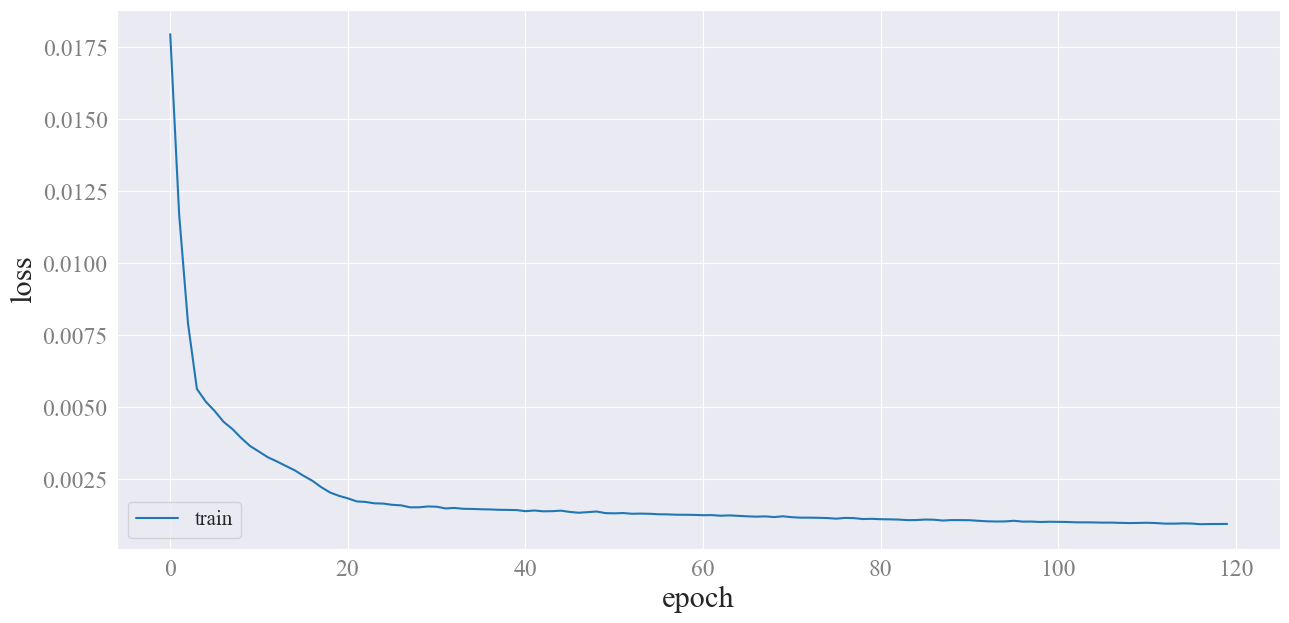

In [36]:
fig = plt.figure(figsize=(15,7))
pyplot.plot(model.history.history['loss'], label='train')
# pyplot.title('负荷 loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.show()

# 画图查看网络结构
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
display(SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg')))
plot_model(model,show_shapes=True,dpi=500,to_file=r'C:\Users\Administrator\Desktop\活\接活论文\模型图片\模型.png')

In [37]:
#构建预测输入数据
df_week_input_pre = df_week_input.iloc[-pre_number:,-zhou*df.shape[1]:]

In [38]:
true_input = scaler_load.transform(true)
true.iloc[:,:]  = true_input
true = true.reset_index(drop = True)

In [39]:
df_week_input_pre

,var1(t-504),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
44376,0.623703,0.123670,0.285492,0.000455,0.550730,0.205012,0.130100,0.227273,1,0.000000,...,0.000455,0.550730,0.205012,0.130100,0.227273,1,0.000000,0.090909,0.0,1
44377,0.599828,0.107515,0.286930,0.000697,0.546343,0.190441,0.118071,0.227273,1,0.043478,...,0.000697,0.546343,0.190441,0.118071,0.227273,1,0.043478,0.090909,0.0,1
44378,0.570353,0.095390,0.285863,0.005090,0.541469,0.175965,0.106716,0.227273,1,0.086957,...,0.005090,0.541469,0.175965,0.106716,0.227273,1,0.086957,0.090909,0.0,1
44379,0.559008,0.088019,0.284473,0.010059,0.537058,0.163252,0.098838,0.227273,1,0.130435,...,0.010059,0.537058,0.163252,0.098838,0.227273,1,0.130435,0.090909,0.0,1
44380,0.556030,0.078381,0.285931,0.007922,0.504422,0.151144,0.094511,0.227273,1,0.173913,...,0.007922,0.504422,0.151144,0.094511,0.227273,1,0.173913,0.090909,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44539,0.709708,0.239023,0.316463,0.007820,0.618995,0.323810,0.327268,0.000000,0,0.826087,...,0.007820,0.618995,0.323810,0.327268,0.000000,0,0.826087,0.181818,1.0,0
44540,0.716401,0.222721,0.326961,0.015347,0.618076,0.289311,0.274089,0.000000,0,0.869565,...,0.015347,0.618076,0.289311,0.274089,0.000000,0,0.869565,0.181818,1.0,0
44541,0.698454,0.211619,0.328505,0.019738,0.617229,0.262521,0.236797,0.000000,0,0.913043,...,0.019738,0.617229,0.262521,0.236797,0.000000,0,0.913043,0.181818,1.0,0
44542,0.684622,0.200062,0.331156,0.021926,0.605429,0.236661,0.208420,0.000000,0,0.956522,...,0.021926,0.605429,0.236661,0.208420,0.000000,0,0.956522,0.181818,1.0,0


In [40]:
df.shape[1]

13

In [41]:
df_week_input_pre = df_week_input_pre.reset_index(drop = True)
df_week_input_pre_1 = pd.DataFrame()
for i in range (zhou+1):
    if i < zhou:
        df_week_input_pre_1 = pd.concat([df_week_input_pre_1,df_week_input_pre.iloc[:,df.shape[1]*i]],axis = 1)
        df_week_input_pre_1 = pd.concat([df_week_input_pre_1,true.iloc[:,-df.shape[1]+1:]],axis = 1)
df_week_input_pre_1 = df_week_input_pre_1.values.reshape(df_week_input_pre.shape[0],zhou,df.shape[1])

In [42]:
#构建临近点预测输入
df_point_input_pre = df_point_input.iloc[-dian:,-df.shape[1]:]
df_point_input_pre =df_point_input_pre.reset_index(drop=True)

In [43]:
true_wea_time = true.loc[true.index.repeat(dian)].reset_index(drop=True).iloc[:,1:]

In [44]:
df_point_input_pre = df_point_input_pre.iloc[:,[0]]

In [45]:
pred = true.copy()

In [46]:
#predict
#因为每次只能预测 1 个数据，但是我要预测24个数据，所以采用的就是循环预测的思路。每次预测的1个数据，添加到数据集中充当预测x，然后在预测新的1个y，再添加到预测x列表中，如此往复。最终预测出24个点。
predict_xlist1 = []#添加预测x列表
predict_x1 = []
predict_x2 = []
predict_y_inv = []#添加预测y列表
predict_xlist1.extend(df_point_input_pre.iloc[:,0].values.tolist())
for i in range(24*7):
    predict_x1 = np.append(np.array(predict_xlist1[-dian:]).reshape(-1,1),true_wea_time.iloc[dian*i:dian*(i+1),:].values,axis = 1)
    predict_x1 = predict_x1.reshape(1,dian,df.shape[1])
    
    predict_x2 = df_week_input_pre_1[i].reshape((1,zhou,df.shape[1]))
    #预测新值
    lstm_predict = model.predict([predict_x1,predict_x2])
    #predict_list.append(train_predict)#新值y添加进列表，做x
#滚动预测
    predict_xlist1.extend(lstm_predict[0])#将新预测出来的predict_steps个数据，加入predict_xlist列表，用于下次预测

# invert
    predict_y_inv.extend(lstm_predict[0])#预测的结果y，每次预测的1个数据，添加进去，直到预测24个为止

pred.iloc[:,0] = predict_y_inv
predict_y = scaler_load.inverse_transform(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [47]:
predict_y = pd.DataFrame(predict_y).iloc[:,0].values

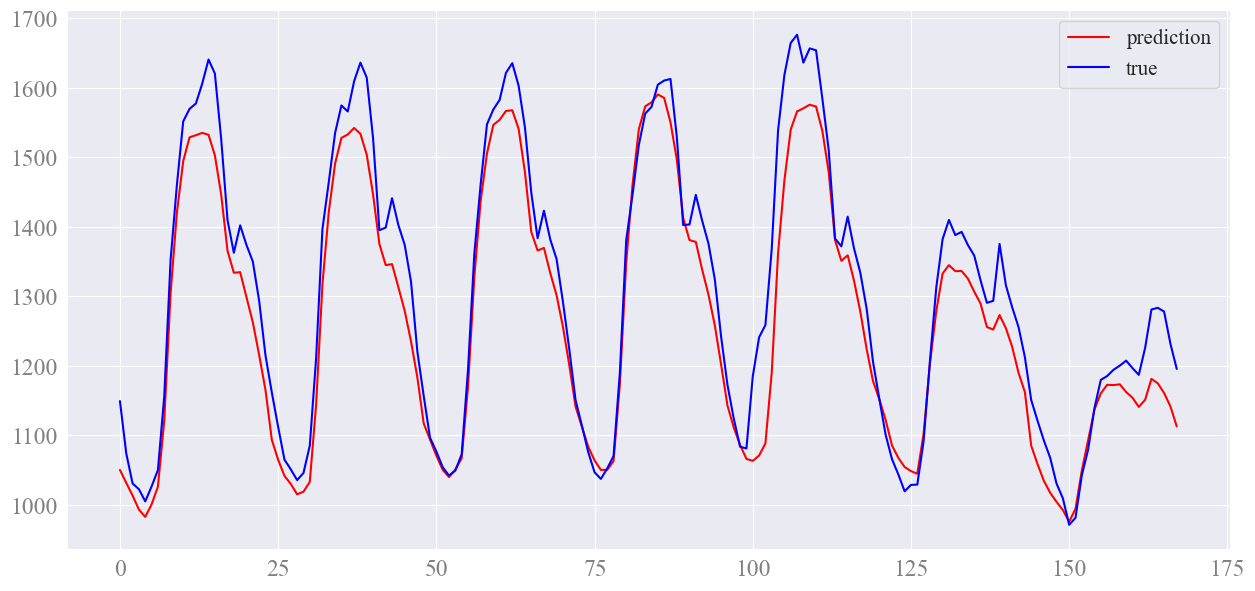

Test RMSE: 60.328
Test Mape: 3.567
Test SMape: 3.666
模型运行时间:114.127 S


In [48]:
fig = plt.figure(figsize=(15,7))
pyplot.plot(np.array(predict_y),'r',label='prediction')
pyplot.plot(true_Y,'b',label='true')
pyplot.legend(loc='upper right')
pyplot.show()

# calculate RMSE 
rmse = np.sqrt(mean_squared_error(np.array(predict_y),true_Y))
print('Test RMSE: %.3f' % rmse)
def mape(Pre,true):
    return np.mean(np.abs((Pre - true) / true)) * 100
def smape(Pre,true):
    return 2.0 * np.mean(np.abs(Pre - true) / (np.abs(Pre) + np.abs(true))) * 100
print('Test Mape: %.3f' % mape(np.squeeze(np.array(predict_y)),true_Y))
print('Test SMape: %.3f' % smape(np.squeeze(np.array(predict_y)),true_Y))
print(f'模型运行时间:{run_time:7.3f} S')

c = pd.DataFrame(true_Y,columns=["真实值"])
c.to_csv(r"C:\Users\Administrator\Desktop\活\接活论文\2020.03表现最好\2020年03月真实值结果.csv",sep=',',index=False,header=True,encoding='utf-8-sig')

c = pd.DataFrame(predict_y,columns=["预测值"])
c.to_csv(r"C:\Users\Administrator\Desktop\活\接活论文\2020.06\2020年06月预测结果.csv",sep=',',index=False,header=True,encoding='utf-8-sig')